In [1]:
%matplotlib inline
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from statannotations.Annotator import Annotator
mpl.rcParams["figure.dpi"] = 300
sns.set(style="ticks")

In [2]:
data_file = "./data/41467_2022_33749_MOESM6_ESM.xlsx"
df = pd.read_excel(data_file,
                   sheet_name="Fig 6",
                   usecols="A:I",
                   skiprows=131, nrows=3)

df.columns = pd.MultiIndex.from_arrays([
    ["Basal"]*3+["ATP Production"]*3+
    ["mMaximal"]*3,
    ["WT", r"$Ahr$ HKO",
     r"$Ahr$ HKO+PPP2R2D"]*3],
    names=["Condition", "Genotype"]
)

df

Condition      Basal                              ATP Production              
Genotype          WT  $Ahr$ HKO $Ahr$ HKO+PPP2R2D             WT  $Ahr$ HKO   
0          71.273778  83.350935         68.358501      66.306375  87.422251  \
1          73.420112  97.487814         67.578808      62.214828  89.790192   
2          71.708794  85.156548         72.544019      64.331178  81.741734   

Condition                      mMaximal                                
Genotype  $Ahr$ HKO+PPP2R2D          WT   $Ahr$ HKO $Ahr$ HKO+PPP2R2D  
0                 68.124723  197.015770  408.640974        225.600084  
1                 63.152850  242.813700  414.266722        276.938815  
2                 67.114518  245.072242  352.623033        264.714541

In [3]:
df = df.melt(
    value_name="OCR (pmol/min/well)"
)
df.head()

,Condition,Genotype,OCR (pmol/min/well)
0,Basal,WT,71.273778
1,Basal,WT,73.420112
2,Basal,WT,71.708794
3,Basal,$Ahr$ HKO,83.350935
4,Basal,$Ahr$ HKO,97.487814


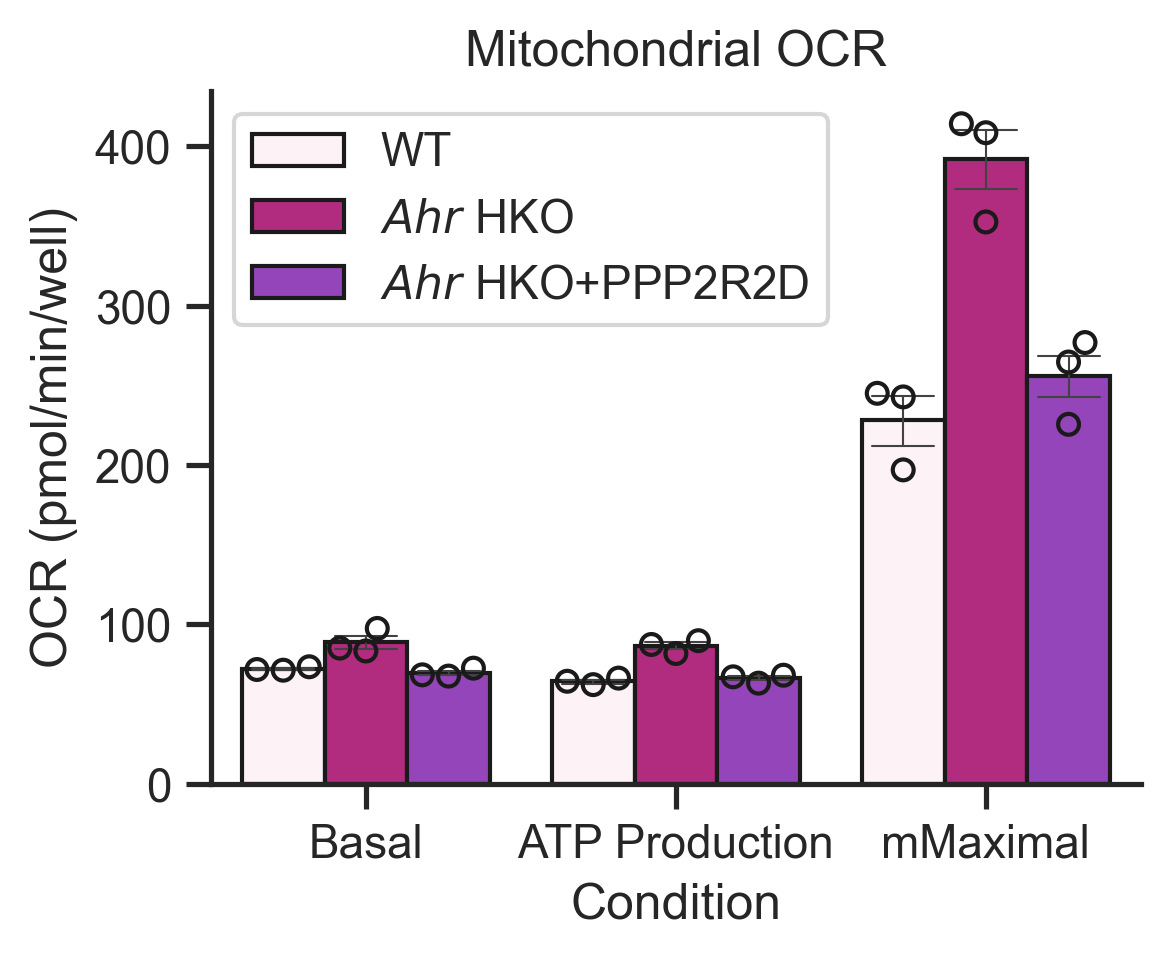

In [4]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)

sns.barplot(data=df,
            x="Condition",
            y="OCR (pmol/min/well)",
            hue="Genotype",
            palette=["lavenderblush",
                     "mediumvioletred",
                     "darkorchid"],
            lw=1, ec="k",
            capsize=0.2, errwidth=0.5, ci=68,
            ax=ax)

sns.swarmplot(data=df,
              x="Condition",
              y="OCR (pmol/min/well)",
              hue="Genotype",
              palette=["lavenderblush",
                     "mediumvioletred",
                     "darkorchid"],
              fc="none", ec="k", marker="o",
              linewidth=1.0, dodge=True,
              ax=ax
              )

ax.set_title("Mitochondrial OCR")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:])

sns.despine()

In [5]:
data_file = "./data/41467_2022_34346_MOESM4_ESM.xlsx"
df = pd.read_excel(data_file,
                   sheet_name="Figure.2",
                   usecols="B:N",
                   skiprows=20, nrows=3,
                   index_col=0,
                   header=None)

df.index.name = "Treatment"
df.columns = pd.MultiIndex.from_arrays([
    ["Sh-Scramble"]*4+["Sh-TMUB1#1"]*4+
    ["Sh-TMUB1#2"]*4,
    ["Rep1", "Rep2", "Rep3", "Rep4"]*3],
    names=["Cells", "Replicate"])

df = df.reset_index()
df = df.melt(id_vars="Treatment",
             value_name="Relative PD-L1 intensity")
df.head()

,Treatment,Cells,Replicate,Relative PD-L1 intensity
0,Control,Sh-Scramble,Rep1,1.00
1,CQ,Sh-Scramble,Rep1,2.08
2,MG132,Sh-Scramble,Rep1,2.38
3,Control,Sh-Scramble,Rep2,1.00
4,CQ,Sh-Scramble,Rep2,1.86


/Users/br171440/.mambaforge3_x86-64/envs/python-r/lib/python3.11/site-packages/statannotations/stats/StatTest.py:77: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stat, pval = self._func(group_data1, group_data2, *self.args,


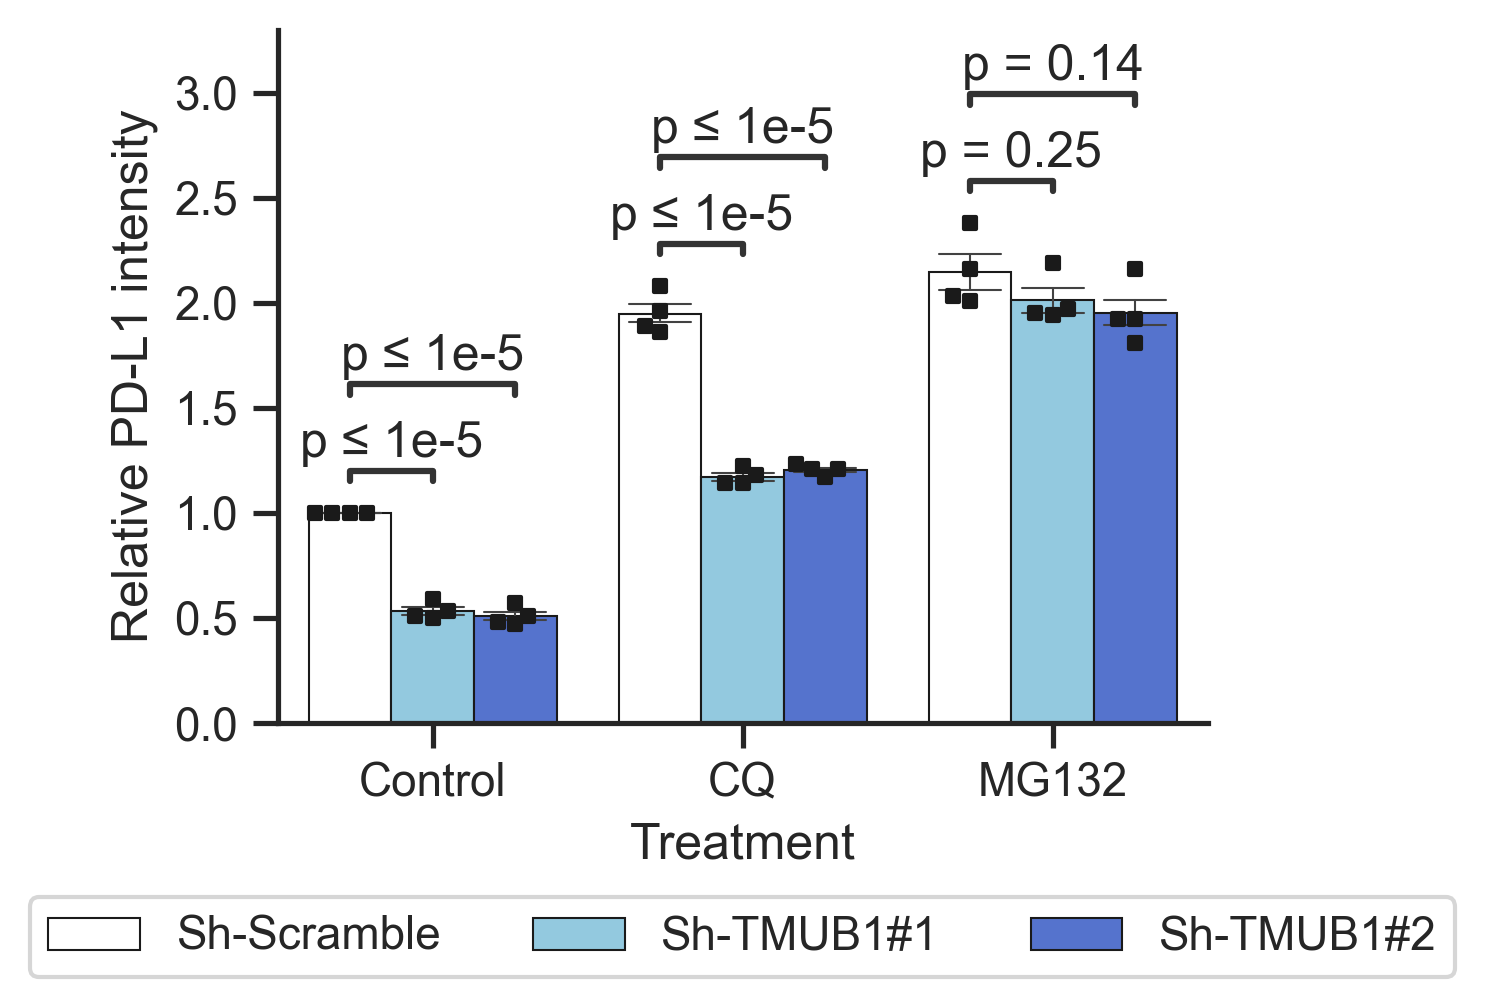

In [6]:
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(111)

plot_data = {"data": df,
             "x": "Treatment",
             "y": "Relative PD-L1 intensity",
             "hue": "Cells"}

sns.barplot(**plot_data,
            palette=["White", "skyblue",
                     "royalblue"],
            lw=0.5, ec="k",
            capsize=0.2, errwidth=0.5, ci=68,
            ax=ax)

sns.swarmplot(**plot_data,
              fc="k", ec="k", linewidth=1.0,
              marker="s", size=3,
              dodge=True,
              ax=ax)

pairs = [(("Control", "Sh-Scramble"),
          ("Control", "Sh-TMUB1#1")),
         (("Control", "Sh-Scramble"),
          ("Control", "Sh-TMUB1#2")),
         (("CQ", "Sh-Scramble"),
          ("CQ", "Sh-TMUB1#1")),
         (("CQ", "Sh-Scramble"),
          ("CQ", "Sh-TMUB1#2")),
         (("MG132", "Sh-Scramble"),
          ("MG132", "Sh-TMUB1#1")),
         (("MG132", "Sh-Scramble"),
          ("MG132", "Sh-TMUB1#2"))
         ]

annotator = Annotator(
    ax, pairs, **plot_data, verbose=False
)

annotator.configure(test="t-test_ind",
                    text_format="simple",
                    show_test_name=False,)
annotator.apply_and_annotate()

handles, labels = ax.get_legend_handles_labels()

ax.legend(handles[3:], labels[3:],
          loc="lower center", ncol=3,
          bbox_to_anchor=[0.5, -0.4])

sns.despine()

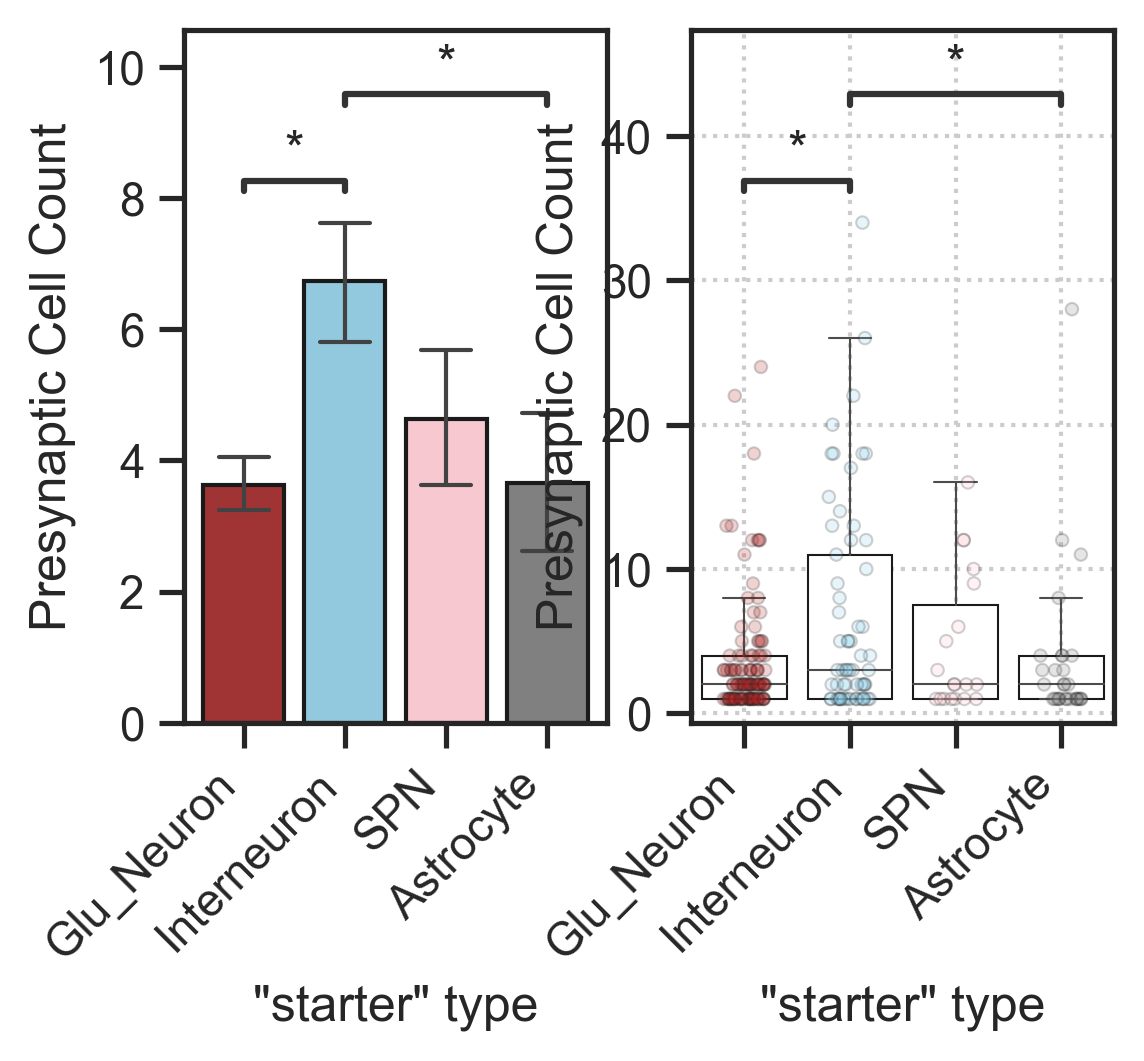

In [7]:
data_url = "./data/saunders_source_data/Figure_3h.csv"
df = pd.read_csv(data_url,
                 skiprows=1, header=None,
                 index_col=0)
df.columns = ["Experiment", '"starter" type',
              "Presynaptic Cell Count"]

plot_data = {"data": df,
             "x": '"starter" type',
             "y": 'Presynaptic Cell Count',
             "order": ["Glu_Neuron",
                       "Interneuron",
                       "SPN", "Astrocyte"]}

def add_annotation(ax):
    pairs = [("Glu_Neuron", "Interneuron"),
             ("Interneuron", "Astrocyte")]
    annotator = Annotator(
        ax, pairs, **plot_data, verbose=False
    )
    annotator.configure(
        test="Mann-Whitney",
        text_format="star"
    )
    annotator.apply_and_annotate()


fig = plt.figure(figsize=(4, 3))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


sns.barplot(**plot_data,
            palette=["firebrick", "skyblue",
                     "pink", "gray"],
            lw=1.0, ec="k",
            capsize=0.5, errwidth=1.0, ci=68,
            ax=ax1)

plt.setp(ax1.get_xticklabels(), rotation=45,
         ha="right")
add_annotation(ax1)


sns.stripplot(**plot_data,
              palette=["firebrick", "skyblue",
                      "pink", "gray"],
              size=3, alpha=0.2,jitter=0.2,
              ec="k", marker="o",
              linewidth=0.5,
              ax=ax2)

sns.boxplot(**plot_data,
            linewidth=0.5, showfliers=False,
            boxprops={"facecolor": "white",
                      "edgecolor": "k"},
            ax=ax2
            )

ax2.grid(linestyle=":")
plt.setp(ax2.get_xticklabels(), rotation=45,
         ha="right")
add_annotation(ax2)